# Data Tagging

This notebook shows how to use tagging when acquiring data in order to create datasets.

Tags are used to manually annotate sensor data during the acquisition.

It is possible to customize labels used for data tagging.

A single datalog acquisition may contain several time intervals that are associated with different tags: we then need to cut&paste homogeneous segments in order to create datasets for each class of interest.

In [4]:
import warnings
warnings.filterwarnings("ignore")

import HSD_utils.logger as logger
from HSD.HSDatalog import HSDatalog
import os
from ipywidgets import *

acq = "20220425_08_40_53" # this acquisition includes two tags: 'slow' and 'fast'
acq_folder = os.path.join(os.getcwd(),"datalogs",acq)
hsd = HSDatalog(acq_folder)


NOTE: ```hsd.get_sensor_plot()``` does not seem to work

['fast', 'slow']


True

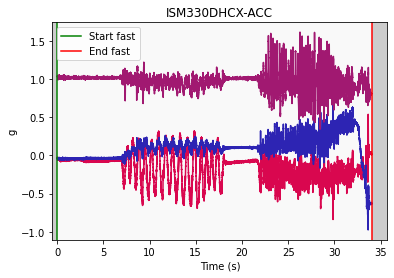

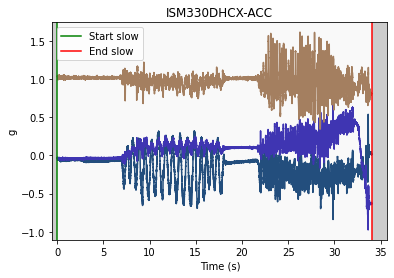

In [5]:
label_list = hsd.get_acquisition_label_classes()
print(label_list)

sensor_name = "ISM330DHCX"
sensor_type = "ACC"
hsd.get_sensor_plot(sensor_name, sensor_type, label='fast')
hsd.get_sensor_plot(sensor_name, sensor_type, label='slow')

In [8]:
hsd.get_time_tags()

[{'Label': 'fast', 'time_start': 22.02554445, 'time_end': 31.08315826},
 {'Label': 'slow', 'time_start': 6.982145917, 'time_end': 16.99552927}]

In [9]:
hsd.get_data_stream_tags(sensor_name,sensor_type,0,-1)

[{'Label': 'fast',
  'time_start': 22.02554445,
  'time_end': 31.08315826,
  'sample_start': 153998,
  'sample_end': 217445},
 {'Label': 'slow',
  'time_start': 6.982145917,
  'time_end': 16.99552927,
  'sample_start': 48617,
  'sample_end': 118761}]